<a href="https://colab.research.google.com/github/MattRamb97/Erasmus_Hardgainers/blob/main/Recipes_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RECIPES MODEL**

We utilized the URLs provided to access the datasets stored in the folder https://raw.githubusercontent.com/MattRamb97/Erasmus_Hardgainers/main/Datasets/

using the pandas library. Subsequently, we identified an issue in the 'ingredients' column of the three datasets, characterized by the presence of the word 'ADVERTISEMENT', which we proceeded to remove. Additionally, we printed information regarding one of the datasets (the same information applies to the others) and their respective shapes.

In [1]:
url_1 = 'https://raw.githubusercontent.com/MattRamb97/Erasmus_Hardgainers/main/Datasets/recipes_raw_nosource_ar.json'
url_2 = 'https://raw.githubusercontent.com/MattRamb97/Erasmus_Hardgainers/main/Datasets/recipes_raw_nosource_epi.json'
url_3 = 'https://raw.githubusercontent.com/MattRamb97/Erasmus_Hardgainers/main/Datasets/recipes_raw_nosource_fn.json'

import pandas as pd
df_ar = pd.read_json(url_1, orient='records', dtype='dict').transpose()
df_ar.info()
print()
df_epi = pd.read_json(url_2, orient='records', dtype='dict').transpose()
df_fn = pd.read_json(url_3, orient='records', dtype='dict').transpose()

df_ar['title'] = df_ar['title'].astype(str)
df_epi['title'] = df_epi['title'].astype(str)
df_fn['title'] = df_fn['title'].astype(str)

# Remove the word 'ADVERTISEMENT' from each text entry in the 'ingridients'
df_ar['ingredients'] = df_ar['ingredients'].astype(str).str.replace('ADVERTISEMENT', '',regex=True)
df_epi['ingredients'] = df_epi['ingredients'].astype(str).str.replace('ADVERTISEMENT', '',regex=True)
df_fn['ingredients'] = df_fn['ingredients'].astype(str).str.replace('ADVERTISEMENT', '',regex=True)

df_ar['instructions'] = df_ar['instructions'].astype(str)
df_epi['instructions'] = df_epi['instructions'].astype(str)
df_fn['instructions'] = df_fn['instructions'].astype(str)

print('From AR:', df_ar.shape)
print('From EPI: ', df_epi.shape)
print('FROM FN:', df_fn.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 39802 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39522 non-null  object
 1   ingredients   39522 non-null  object
 2   instructions  39522 non-null  object
 3   picture_link  39522 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB

From AR: (39802, 4)
From EPI:  (25323, 4)
FROM FN: (60039, 4)


We cleaned the three datasets using two function:
- uncontract(): expands contracted words commonly found in English sentences into their full forms using regular expressions.
- clean_recepies(): removes non-alphanumeric characters from the input text except for spaces and hyphens. It then replaces multiple spaces and hyphens with a single space and normalizes units of measurement (e.g., cups, tablespoons) by removing them. Next, it removes numerical digits, assuming they represent quantities. Finally, it normalizes whitespace by removing extra spaces and ensuring consistent spacing between words.

In [2]:
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 297.6/297.6 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

Create a formatting_func to structure training examples as prompts.

In [3]:
def formatting_func(title, ingredients, instructions):
    text = f"### Title: {title}\n ### Ingredients: {ingredients}\n ### Instructions: {instructions}"
    return text
'''
def formatting_func(example):
    text = f"### Title: {example['input']}\n ### Ingredients: {example['output']}"
    return text
'''

'\ndef formatting_func(example):\n    text = f"### Title: {example[\'input\']}\n ### Ingredients: {example[\'output\']}"\n    return text\n'

Load Mistral - mistralai/Mistral-7B-v0.1

In [4]:
!huggingface-cli login
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config, device_map="auto")


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Set up the tokenizer. Add padding on the left as it makes training use less memory. For model_max_length, it's helpful to get a distribution of your data lengths. Let's first tokenize without the truncation/padding, so we can get a length distribution.

In [5]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(title, ingredients, instructions):
    return tokenizer(formatting_func(title, ingredients, instructions))
'''
def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))
'''

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

'\ndef generate_and_tokenize_prompt(prompt):\n    return tokenizer(formatting_func(prompt))\n'

Reformat the prompt and tokenize each sample

In [6]:
tokenized_titles = []
tokenized_ingredients = []
tokenized_instructions = []

for title, ingredients, instructions in zip(df_ar['title'].iloc[:200], df_ar['ingredients'].iloc[:200], df_ar['instructions'].iloc[:200]):
    tokenized_titles.append(generate_and_tokenize_prompt(title, ingredients, instructions))
    tokenized_ingredients.append(generate_and_tokenize_prompt(title, ingredients, instructions))
    tokenized_instructions.append(generate_and_tokenize_prompt(title, ingredients, instructions))

#tokenized_titles = [generate_and_tokenize_prompt(title, ingredients) for title, ingredients in zip(df_ar['title'], df_ar['ingredients'])]

Let's get a distribution of our dataset lengths, so we can determine the appropriate max_length for our input tensors.

400


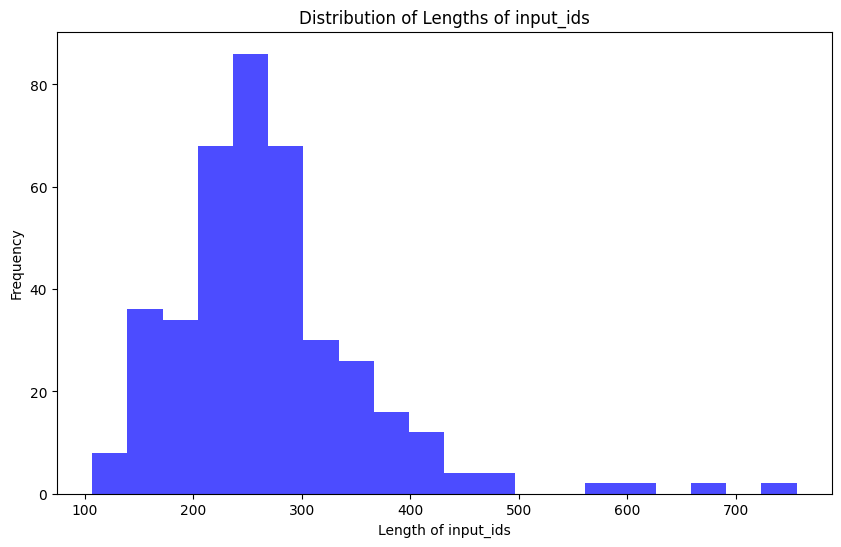

In [7]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_titles, tokenized_ingredients):
    lengths = [len(x['input_ids']) for x in tokenized_titles]
    lengths += [len(x['input_ids']) for x in tokenized_ingredients]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_titles, tokenized_ingredients)

In [8]:
max_length = 365  # This was an appropriate max length for my dataset

def generate_and_tokenize_prompt2(title, ingredients, instructions):
    title_result = tokenizer(
        title,
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    ingredients_result = tokenizer(
        ingredients,
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    instructions_result = tokenizer(
        instructions,
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )

    title_result["labels"] = title_result["input_ids"].copy()
    ingredients_result["labels"] = ingredients_result["input_ids"].copy()
    instructions_result["labels"] = title_result["input_ids"].copy()

    return title_result, ingredients_result, instructions_result

tokenized_titles2 = []
tokenized_ingredients2 = []
tokenized_instructions2 = []

'''
for title, ingredients, instructions in zip(df_ar['title'].iloc[:200], df_ar['ingredients'].iloc[:200], df_ar['instructions'].iloc[:200]):
    title_result, ingredients_result, instructions_result = generate_and_tokenize_prompt2(title, ingredients, instructions)
    tokenized_titles2.append(title_result)
    tokenized_ingredients2.append(ingredients_result)
    tokenized_instructions2.append(instructions_result)
'''
# Tokenization of the dataset
tokenized_data = []
for title, ingredients, instructions in zip(df_ar['title'].iloc[:200], df_ar['ingredients'].iloc[:200], df_ar['instructions'].iloc[:200]):
    title_result, ingredients_result, instructions_result = generate_and_tokenize_prompt2(title, ingredients, instructions)
    # Concatenating results into a single input
    combined_input_ids = title_result["input_ids"] + ingredients_result["input_ids"] + instructions_result["input_ids"]
    combined_labels = title_result["labels"] + ingredients_result["labels"] + instructions_result["labels"]
    tokenized_data.append({'input_ids': combined_input_ids, 'labels': combined_labels})

# Split data into training and evaluation datasets
split_index = int(0.8 * len(tokenized_data))
train_dataset = tokenized_data[:split_index]
eval_dataset = tokenized_data[split_index:]


0


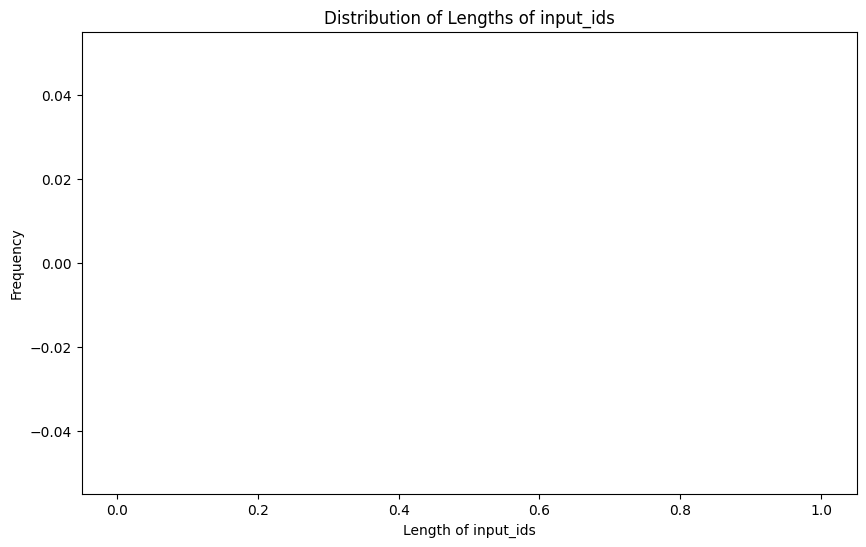

In [9]:
plot_data_lengths(tokenized_titles2, tokenized_ingredients2)

In [10]:
eval_prompt = f"### Title: {title}\n ### Ingredients: {ingredients}\n ### Instructions: {instructions}"

# Init an eval tokenizer that doesn't add padding or eos token
eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(model.generate(**model_input, max_new_tokens=256, repetition_penalty=1.15)[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### Title: Classic Waffles
 ### Ingredients: ['2 cups all-purpose flour ', '1 teaspoon salt ', '4 teaspoons baking powder ', '2 tablespoons white sugar ', '2 eggs ', '1 1/2 cups warm milk ', '1/3 cup butter, melted ', '1 teaspoon vanilla extract ', '']
 ### Instructions: In a large bowl, mix together flour, salt, baking powder and sugar; set aside. Preheat waffle iron to desired temperature.
In a separate bowl, beat the eggs. Stir in the milk, butter and vanilla. Pour the milk mixture into the flour mixture; beat until blended.
Ladle the batter into a preheated waffle iron. Cook the waffles until golden and crisp. Serve immediately.
### Source: https://www.allrecipes.com/recipe/20789/classic-waffles/

### Title: Chocolate Chip Cookie Dough Ice Cream
 ### Ingredients: ['1 (16 ounce) package refrigerated chocolate chip cookie dough ', '1 quart vanilla ice cream ', '1/2 cup hot fudge sauce ', '1/2 cup caramel sundae syrup ',]
 ### Instructions: Cut cookie dough into small pieces. Place ha



---



**Set Up LoRA**

Now, to start our fine-tuning, we have to apply some preprocessing to the model to prepare it for training. For that use the prepare_model_for_kbit_training method from PEFT.

In [11]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [12]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

Let's print the model to examine its layers, as we will apply QLoRA to all the linear layers of the model. Those layers are q_proj, k_proj, v_proj, o_proj, gate_proj, up_proj, down_proj, and lm_head.

In [13]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )

Here we define the LoRA config.

r is the rank of the low-rank matrix used in the adapters, which thus controls the number of parameters trained. A higher rank will allow for more expressivity, but there is a compute tradeoff.

alpha is the scaling factor for the learned weights. The weight matrix is scaled by alpha/r, and thus a higher value for alpha assigns more weight to the LoRA activations.

The values used in the QLoRA paper were r=64 and lora_alpha=16, and these are said to generalize well, but we will use r=32 and lora_alpha=64 so that we have more emphasis on the new fine-tuned data while also reducing computational complexity.

In [14]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


See how the model looks different now, with the LoRA adapters added:

In [15]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer):



---



**TRAINING LoRA MODEL**

In [16]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [17]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

model = accelerator.prepare_model(model)

In [18]:
!pip install -q wandb -U

import wandb, os
wandb.login()

wandb_project = "journal-finetune"
if len(wandb_project) > 0:
    os.environ["WANDB_PROJECT"] = wandb_project

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 207.3/207.3 kB 20.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 266.8/266.8 kB 21.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [19]:
import transformers
from datetime import datetime

'''
tokenized_titles2_train = tokenized_titles2[:100]
tokenized_titles2_eval = tokenized_titles2[100:200]
'''

project = "recepies-model"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

'''
trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_titles2_train,
    eval_dataset=tokenized_titles2_eval,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=500,
        learning_rate=2.5e-5, # Want a small lr for finetuning
        fp16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
        report_to="wandb",           # Comment this out if you don't want to use weights & baises
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()
'''
import transformers
from transformers import TrainingArguments, Trainer
from datetime import datetime
import torch

# Initialize Trainer with your model and tokenizer
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir='./output',
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=500,
        learning_rate=2.5e-5,
        fp16=True,
        optim="paged_adamw_8bit",
        logging_steps=25,
        logging_dir="./logs",
        save_strategy="steps",
        save_steps=25,
        evaluation_strategy="steps",
        eval_steps=25,
        do_eval=True,
        report_to="wandb",
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"
    ),
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1463: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


wandb: Currently logged in as: matteo-rambaldi (recipes_model). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:180: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:180: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To main

TrainOutput(global_step=500, training_loss=0.40699677538871765, metrics={'train_runtime': 5622.5955, 'train_samples_per_second': 0.178, 'train_steps_per_second': 0.089, 'total_flos': 4.727575719936e+16, 'train_loss': 0.40699677538871765, 'epoch': 6.25})

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
)

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

In [22]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "output/checkpoint-300")

In [23]:
eval_prompt = f"### Title: {title}\n ### Ingredients: {ingredients}\n ### Instructions: {instructions}"
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=100, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### Title: Classic Waffles
 ### Ingredients: ['2 cups all-purpose flour ', '1 teaspoon salt ', '4 teaspoons baking powder ', '2 tablespoons white sugar ', '2 eggs ', '1 1/2 cups warm milk ', '1/3 cup butter, melted ', '1 teaspoon vanilla extract ', '']
 ### Instructions: In a large bowl, mix together flour, salt, baking powder and sugar; set aside. Preheat waffle iron to desired temperature.
In a separate bowl, beat the eggs. Stir in the milk, butter and vanilla. Pour the milk mixture into the flour mixture; beat until blended.
Ladle the batter into a preheated waffle iron. Cook the waffles until golden and crisp. Serve immediately.

### Nutrition Facts:
 * Percent Daily Values are based on a 2000 calorie diet.

### Serving size: 1

 * Calories: 275.6
 * Cholesterol: 89.3mg
 * Sodium: 533.8mg
 * Potassium: 373.7mg
 * Carbohydrates: 34.


In [27]:
torch.save(model.state_dict(), 'our_model/model_weights.pth')

In [32]:
ingredients_list = ["skinless","onion"]  # Sample ingredients you start with
formatted_ingredients = ", ".join(ingredients_list)
eval_prompt = f"### Ingredients: {formatted_ingredients}\n### Expected Output:\n### Title: {{title}}\n### Other Ingredients: {{other_ingredients}}\n### Instructions: {{instructions}}"

odel_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=100, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### Title: Classic Waffles
 ### Ingredients: ['2 cups all-purpose flour ', '1 teaspoon salt ', '4 teaspoons baking powder ', '2 tablespoons white sugar ', '2 eggs ', '1 1/2 cups warm milk ', '1/3 cup butter, melted ', '1 teaspoon vanilla extract ', '']
 ### Instructions: In a large bowl, mix together flour, salt, baking powder and sugar; set aside. Preheat waffle iron to desired temperature.
In a separate bowl, beat the eggs. Stir in the milk, butter and vanilla. Pour the milk mixture into the flour mixture; beat until blended.
Ladle the batter into a preheated waffle iron. Cook the waffles until golden and crisp. Serve immediately.

### Nutrition Facts:
 * Percent Daily Values are based on a 2000 calorie diet.

### Serving size: 1

 * Calories: 275.6
 * Cholesterol: 89.3mg
 * Sodium: 533.8mg
 * Potassium: 373.7mg
 * Carbohydrates: 34.


In [34]:
eval_prompt = f"Ingredients: # \n Expected Output:\n Title: #\n Other Ingredients: # \n Instructions: #"

odel_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=100, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### Title: Classic Waffles
 ### Ingredients: ['2 cups all-purpose flour ', '1 teaspoon salt ', '4 teaspoons baking powder ', '2 tablespoons white sugar ', '2 eggs ', '1 1/2 cups warm milk ', '1/3 cup butter, melted ', '1 teaspoon vanilla extract ', '']
 ### Instructions: In a large bowl, mix together flour, salt, baking powder and sugar; set aside. Preheat waffle iron to desired temperature.
In a separate bowl, beat the eggs. Stir in the milk, butter and vanilla. Pour the milk mixture into the flour mixture; beat until blended.
Ladle the batter into a preheated waffle iron. Cook the waffles until golden and crisp. Serve immediately.

### Nutrition Facts:
 * Percent Daily Values are based on a 2000 calorie diet.

### Serving size: 1

 * Calories: 275.6
 * Cholesterol: 89.3mg
 * Sodium: 533.8mg
 * Potassium: 373.7mg
 * Carbohydrates: 34.
